In [23]:
import scipy as scipy
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import seaborn as sns

# Important comments/resume
We should maybe select a higher treshold for VPD because its relationship with GPP is not clear

Also wondering if we should use an other indicator than GPP (NPP, SIF...)

We however see that SM is more discriminant than VPD, but might be due to the things discussed above.

# Load data

In [4]:
cha_mat= h5py.File("CHAMAU.mat", 'r')
cha_mat

<HDF5 file "CHAMAU.mat" (mode r)>

In [5]:
cha = pd.DataFrame(
    { 
        'GPP': cha_mat['Gfin'][:].squeeze(), #vérifier que le GPP est bon et son unité #we should maybe use NPP ? calculated each day with the T&C model
        'Ta': cha_mat['Ta'][:].squeeze(),
        'VPD': cha_mat['Ds'][:].squeeze(), #in Pa
        'SM': cha_mat['OF'][:].squeeze(), # first soil layer (surface)
        'SIF':cha_mat['SIF_L'][:].squeeze() #CHA=grassland--> low vegetation
    }
)
cha

,GPP,Ta,VPD,SM,SIF
0,0.000000,2.2570,6.134699,0.000000,0.0
1,-123.887628,2.2945,6.069162,0.430071,NaN
2,-84.551875,2.2490,13.289646,0.428790,NaN
3,-67.942941,2.3290,17.970873,0.428313,NaN
4,-57.318322,2.7175,15.666741,0.428256,NaN
...,...,...,...,...,...
87643,-6.100752,-9.0715,11.282861,0.214186,0.0
87644,-6.547026,-9.7030,13.785815,0.212035,0.0
87645,-6.853434,-10.7695,15.669038,0.210431,0.0
87646,-8.529412,-9.3050,13.607474,0.208364,0.0


In [6]:
start_date = '2005-01-01 00:00:00'
date_range = pd.date_range(start=start_date, periods=len(cha), freq='H')
cha['Date'] = date_range
cha['Date_day'] = cha['Date'].dt.date
cha['Year'] = cha['Date'].dt.year
cha['Month'] = cha['Date'].dt.month
cha['Day'] = cha['Date'].dt.day
cha['Hour'] = cha['Date'].dt.hour

#les data ne vont que jusqu'à 2016 dans CHAMAU alors qu'elles vont jusqu'à 2023 dans les données de base
cha

C:\Users\moeag\AppData\Local\Temp\ipykernel_5568\1901897191.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(cha), freq='H')


,GPP,Ta,VPD,SM,SIF,Date,Date_day,Year,Month,Day,Hour
0,0.000000,2.2570,6.134699,0.000000,0.0,2005-01-01 00:00:00,2005-01-01,2005,1,1,0
1,-123.887628,2.2945,6.069162,0.430071,NaN,2005-01-01 01:00:00,2005-01-01,2005,1,1,1
2,-84.551875,2.2490,13.289646,0.428790,NaN,2005-01-01 02:00:00,2005-01-01,2005,1,1,2
3,-67.942941,2.3290,17.970873,0.428313,NaN,2005-01-01 03:00:00,2005-01-01,2005,1,1,3
4,-57.318322,2.7175,15.666741,0.428256,NaN,2005-01-01 04:00:00,2005-01-01,2005,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
87643,-6.100752,-9.0715,11.282861,0.214186,0.0,2014-12-31 19:00:00,2014-12-31,2014,12,31,19
87644,-6.547026,-9.7030,13.785815,0.212035,0.0,2014-12-31 20:00:00,2014-12-31,2014,12,31,20
87645,-6.853434,-10.7695,15.669038,0.210431,0.0,2014-12-31 21:00:00,2014-12-31,2014,12,31,21
87646,-8.529412,-9.3050,13.607474,0.208364,0.0,2014-12-31 22:00:00,2014-12-31,2014,12,31,22


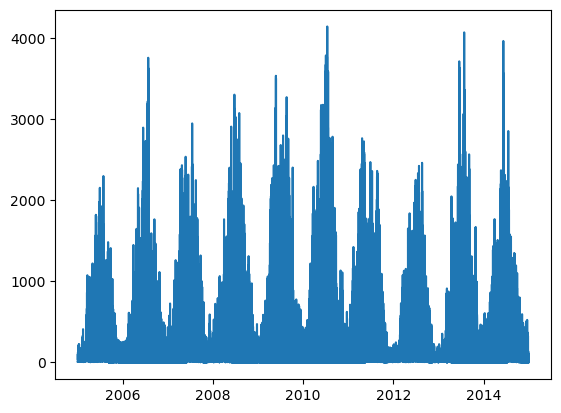

In [56]:
plt.plot(cha['Date'], cha['VPD'])

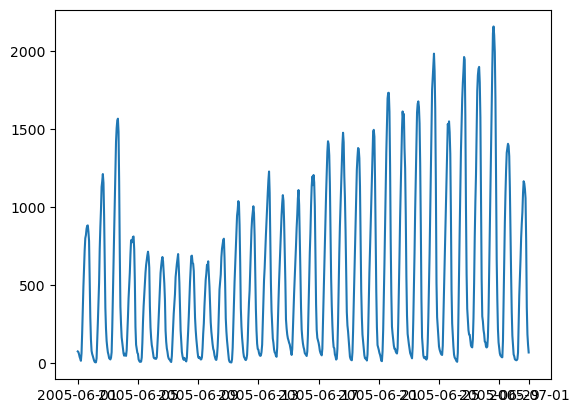

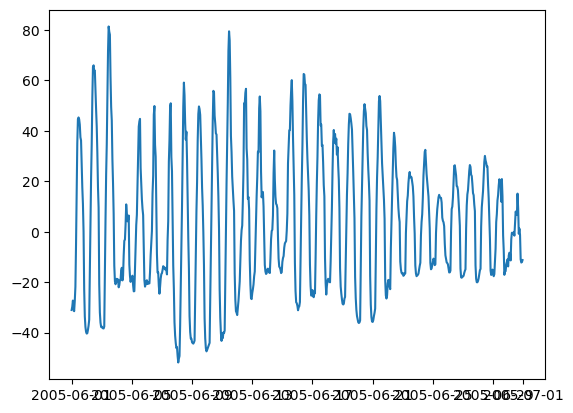

In [ ]:
cha_2005 = cha[(cha['Year'] == 2005) & (cha['Month'] == 6)]

# Graphe GPP vs Date pour juin 2005
plt.figure()
plt.plot(cha_2005['Date'], cha_2005['GPP'])

# Daily mean

In [7]:
# Groupby day to have daily mean
cha_daily = cha.groupby('Date_day')[['Ta','VPD', 'GPP','SM']].mean().reset_index()

#rearrange
cha_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
cha_daily['Date'] = pd.to_datetime(cha_daily['Date'])
cha_daily['Year'] = cha_daily['Date'].dt.year
cha_daily['Month'] = cha_daily['Date'].dt.month
cha_daily['Day'] = cha_daily['Date'].dt.day

cha_daily

,Date,Ta,VPD,GPP,SM,Year,Month,Day
0,2005-01-01,3.506875,34.552570,-39.693137,0.405759,2005,1,1
1,2005-01-02,4.580042,64.360370,-20.854571,0.427769,2005,1,2
2,2005-01-03,1.560708,65.971632,-9.979045,0.427691,2005,1,3
3,2005-01-04,1.037062,58.476064,-16.122545,0.412771,2005,1,4
4,2005-01-05,2.516396,69.353332,-11.439214,0.395775,2005,1,5
...,...,...,...,...,...,...,...,...
3647,2014-12-27,0.382771,45.870856,-2.161770,0.249852,2014,12,27
3648,2014-12-28,-0.905813,55.236311,-21.923808,0.256427,2014,12,28
3649,2014-12-29,-7.178979,30.106732,-76.545060,0.144904,2014,12,29
3650,2014-12-30,-2.971437,7.094880,-11.949765,0.177588,2014,12,30


In [100]:
# Chamau is grassland so we will use net primary production low vegetation
# 'Ta': cha_mat['Ta'][:].squeeze(),
cha_mat['NPP_L'][:].shape
#cha_daily['NPP'] = cha_mat['NPP_L'][:].squeeze()

(1, 3653)

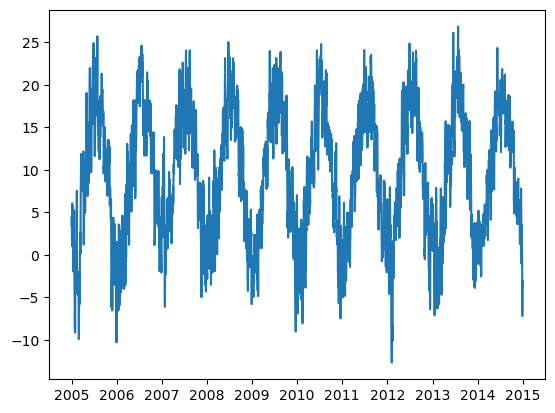

In [54]:
plt.plot(cha_daily['Date'], cha_daily['Ta'])

# Filter data

In [8]:
#Filter the daily data
cha_filtered=cha_daily[(cha_daily['VPD']>500) & (cha_daily['Ta']>15) & (cha_daily['Month'].isin([4, 5, 6, 7, 8, 9]))]
cha_filtered

,Date,Ta,VPD,GPP,SM,Year,Month,Day
144,2005-05-25,16.486125,541.790846,17.864453,0.387202,2005,5,25
145,2005-05-26,19.077437,654.859749,22.296063,0.369477,2005,5,26
146,2005-05-27,21.047333,690.378347,18.426551,0.359195,2005,5,27
147,2005-05-28,21.948625,772.772026,16.346551,0.348879,2005,5,28
148,2005-05-29,21.980708,723.018001,11.235079,0.347644,2005,5,29
...,...,...,...,...,...,...,...,...
3498,2014-07-31,19.829896,641.036763,12.417782,0.397040,2014,7,31
3499,2014-08-01,18.754167,540.735582,8.104036,0.374618,2014,8,1
3506,2014-08-08,20.871021,506.666300,16.766637,0.357113,2014,8,8
3507,2014-08-09,20.869417,542.470531,3.225505,0.350901,2014,8,9


There are 556 observations/days between 2005 and 2014 respecting our three conditions.

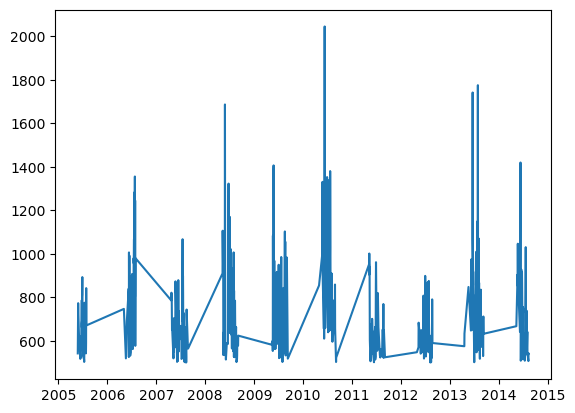

In [55]:
plt.plot(cha_filtered['Date'], cha_filtered['VPD'])

# Divide VPD and SM in bins

{'whiskers': [<matplotlib.lines.Line2D at 0x1925c0c4080>,
 'caps': [<matplotlib.lines.Line2D at 0x1925c0c4500>,
 'boxes': [<matplotlib.lines.Line2D at 0x1925c093dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1925c0c4a70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1925c0c4d40>],
 'means': []}

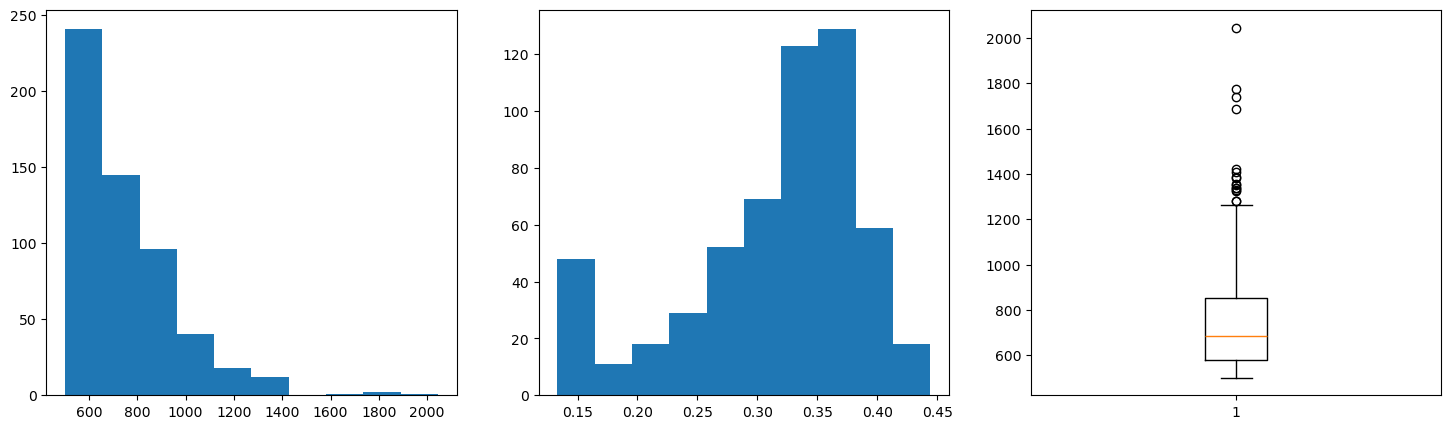

In [82]:
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(cha_filtered['VPD'])
plt.subplot(1, 3, 2)
plt.hist(cha_filtered['SM'])
plt.subplot(1, 3, 3)
plt.boxplot(cha_filtered['VPD'])

In [9]:
#Divide in bins
cha_filtered = cha_filtered.copy() #to have an explicit copy (if not it raises an error)
cha_filtered['SM_bin'] = pd.qcut(cha_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
cha_filtered['VPD_bin'] = pd.qcut(cha_filtered['VPD'], q=10, labels=False) + 1
cha_filtered

,Date,Ta,VPD,GPP,SM,Year,Month,Day,SM_bin,VPD_bin
144,2005-05-25,16.486125,541.790846,17.864453,0.387202,2005,5,25,9,2
145,2005-05-26,19.077437,654.859749,22.296063,0.369477,2005,5,26,8,5
146,2005-05-27,21.047333,690.378347,18.426551,0.359195,2005,5,27,7,6
147,2005-05-28,21.948625,772.772026,16.346551,0.348879,2005,5,28,7,7
148,2005-05-29,21.980708,723.018001,11.235079,0.347644,2005,5,29,6,6
...,...,...,...,...,...,...,...,...,...,...
3498,2014-07-31,19.829896,641.036763,12.417782,0.397040,2014,7,31,10,4
3499,2014-08-01,18.754167,540.735582,8.104036,0.374618,2014,8,1,9,2
3506,2014-08-08,20.871021,506.666300,16.766637,0.357113,2014,8,8,7,1
3507,2014-08-09,20.869417,542.470531,3.225505,0.350901,2014,8,9,7,2


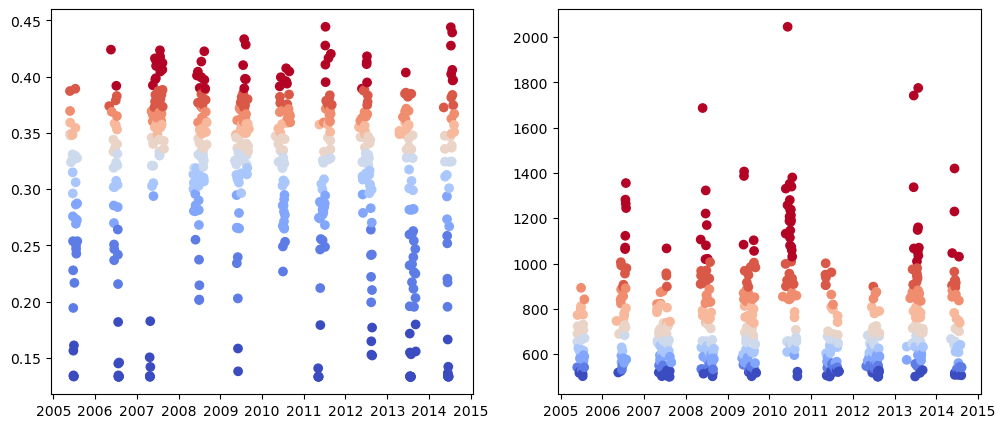

In [10]:
# verification
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(
    cha_filtered['Date'],         
    cha_filtered['SM'],c=cha_filtered['SM_bin'], cmap='coolwarm')
plt.subplot(1,2,2)

plt.scatter(
    cha_filtered['Date'],         
    cha_filtered['VPD'],c=cha_filtered['VPD_bin'], cmap='coolwarm')

 # Relationships between GPP and VPD

Text(0, 0.5, 'GPP')

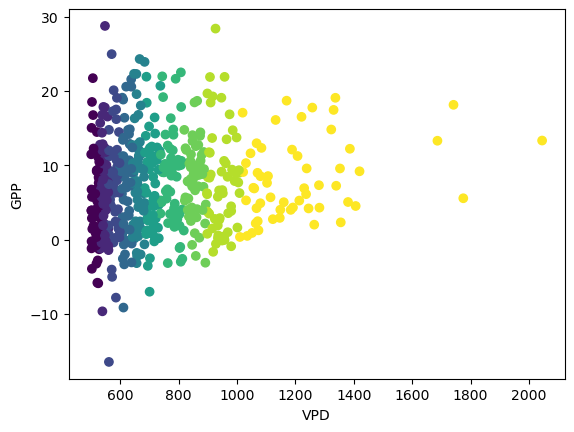

In [ ]:
plt.scatter(cha_filtered['VPD'], cha_filtered['GPP'], c=cha_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('GPP')

The relationship is not clear, we should maybe use a higher threshold.

C:\Users\moeag\AppData\Local\Temp\ipykernel_5568\3900971759.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


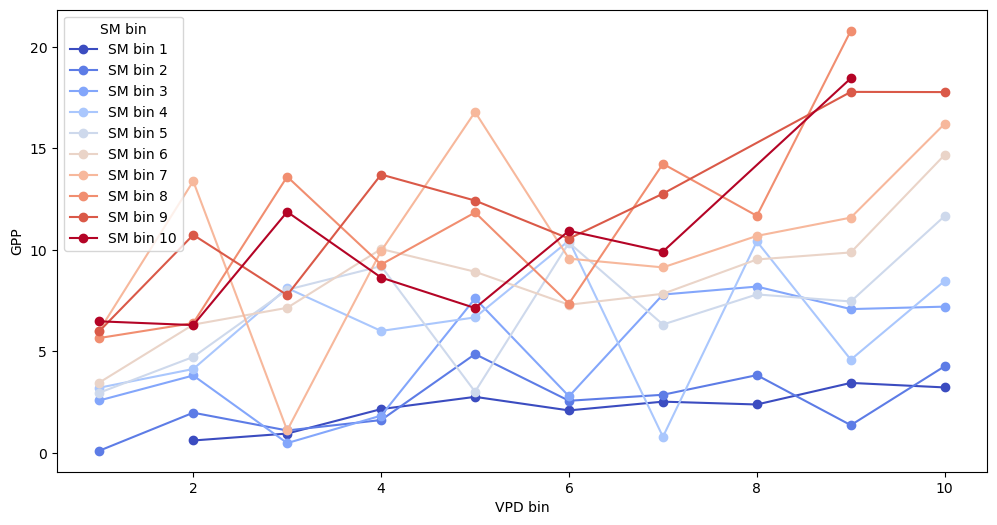

In [11]:
# for each combination of bins
grouped = cha_filtered.groupby(['SM_bin', 'VPD_bin'])['GPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['GPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin')
plt.ylabel('GPP')
plt.show()   

It is strange that GPP seems to increase with VPD

 # Relationships between GPP and soil moisture

Text(0, 0.5, 'GPP')

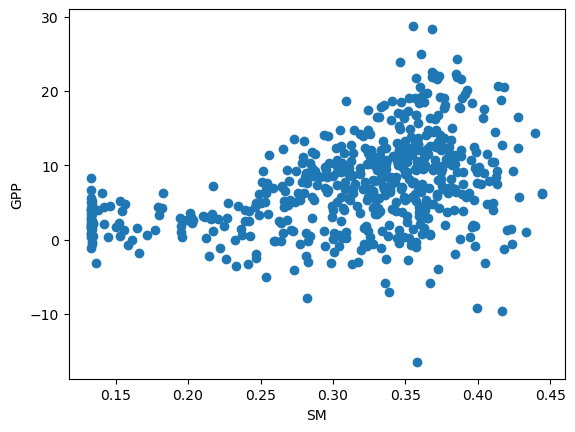

In [101]:
plt.scatter(cha_filtered['SM'], cha_filtered['GPP'])
plt.xlabel('SM')
plt.ylabel('GPP')

C:\Users\moeag\AppData\Local\Temp\ipykernel_60544\1653553456.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


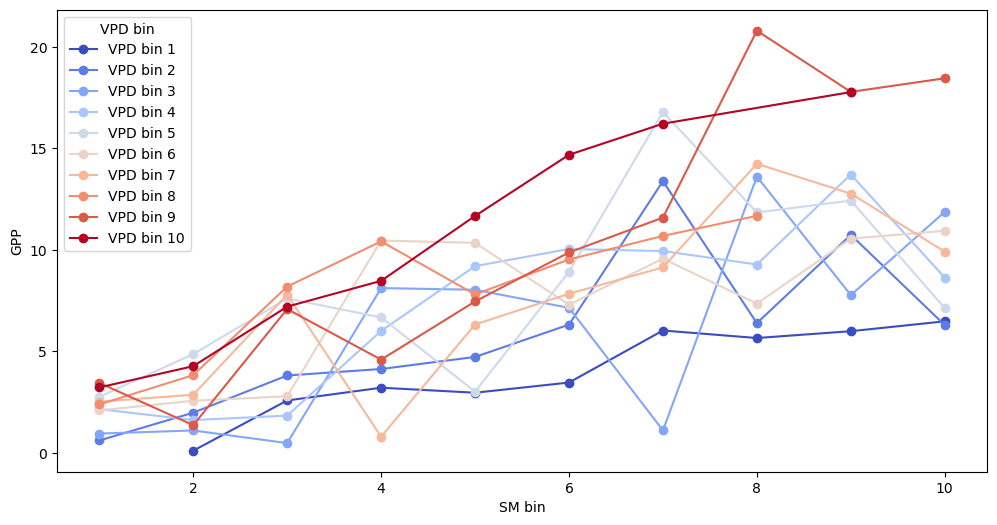

In [121]:
plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['GPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('GPP')
plt.show() 

Here, soil moisture more discriminant than VPD. 

# More analysis

## Heatmap

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

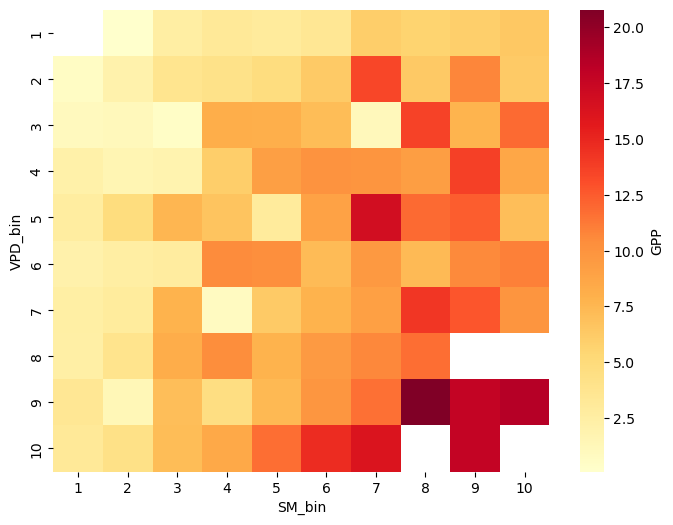

In [116]:
import seaborn as sns
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='GPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'GPP'}
)

It is strange that GPP seems to increase with VPD. However, we also see that SM is discriminant here.

## VPD limitation on GPP without coupling and same for SM (figure 3f, Liu et al.) TO IMPROVE

We used the approach 1 : we calculate the difference between SIF at the highest VPD bin and lowest VPD bin in each SM bin to derive the .SIF(VPD|SM) cf paper for the complete calcul

We could have used the 2nd approach, but we estimated that there were not enough points to do a linear regression, and it is the 1st approach that is shown in their paper.

However, considering the irregular relationship between GPP and VPD, we could have used approach 2 to smooth a bit, or a non linear approach

In [20]:
# for each bin of SM, difference of GPP between max bin vpd and min bin vpd
delta_gpp_vpd = []
for sm_bin in sorted(grouped['SM_bin'].unique()):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    
    if not subset.empty:
        min_vpd_bin = subset['VPD_bin'].min()
        max_vpd_bin = subset['VPD_bin'].max()

        gpp_min = subset[subset['VPD_bin'] == min_vpd_bin]['GPP'].values
        gpp_max = subset[subset['VPD_bin'] == max_vpd_bin]['GPP'].values

        if len(gpp_min) > 0 and len(gpp_max) > 0:
            delta = gpp_max[0] - gpp_min[0]
            delta_gpp_vpd.append({'SM_bin': sm_bin, 'delta_gpp_vpd': delta})

delta_gpp_vpd_df = pd.DataFrame(delta_gpp_vpd)

delta_gpp_vpd_df

,SM_bin,delta_gpp_vpd
0,1,2.614363
1,2,4.164804
2,3,4.623237
3,4,5.264993
4,5,8.709358
5,6,11.222955
6,7,10.189722
7,8,15.141427
8,9,11.781687
9,10,11.974750


In [21]:
delta_gpp_sm = []

for vpd_bin in sorted(grouped['VPD_bin'].unique()):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    
    if not subset.empty:
        min_sm_bin = subset['SM_bin'].min()
        max_sm_bin = subset['SM_bin'].max()

        gpp_min = subset[subset['SM_bin'] == min_sm_bin]['GPP'].values
        gpp_max = subset[subset['SM_bin'] == max_sm_bin]['GPP'].values

        if len(gpp_min) > 0 and len(gpp_max) > 0:
            delta = gpp_max[0] - gpp_min[0]
            delta_gpp_sm.append({'VPD_bin': vpd_bin, 'delta_gpp_sm': delta})

delta_gpp_sm_df = pd.DataFrame(delta_gpp_sm)

delta_gpp_sm_df

,VPD_bin,delta_gpp_sm
0,1,6.375977
1,2,5.685878
2,3,10.924427
3,4,6.481404
4,5,4.376720
5,6,8.850573
6,7,7.394696
7,8,9.293918
8,9,15.009371
9,10,14.552323


(1.6143634278038066, 16.14142710848528)

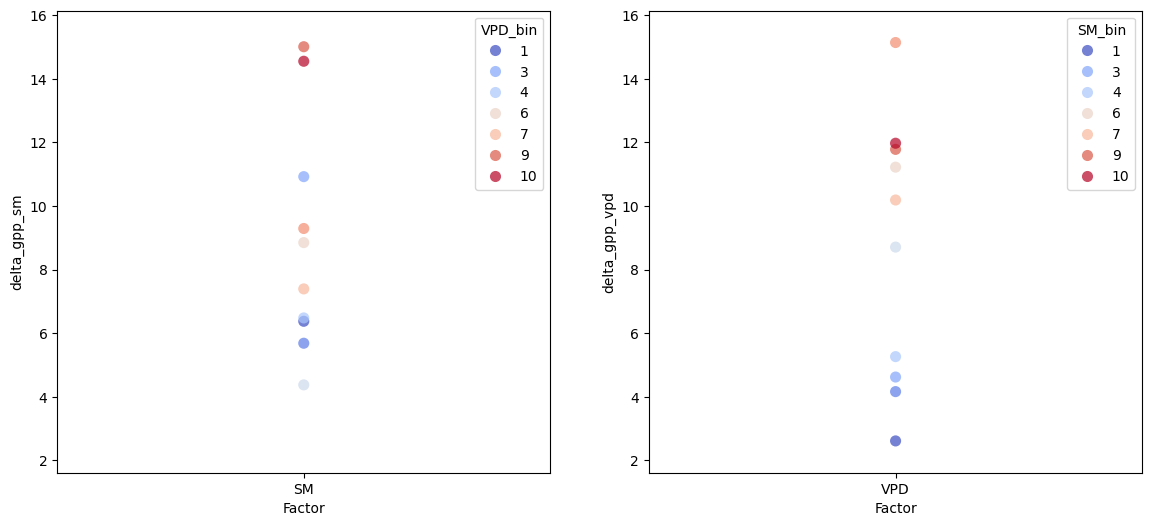

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique pour delta_gpp_sm en fonction des bins VPD
delta_gpp_sm_df['Factor'] = 'SM'
sns.stripplot(x='Factor', y='delta_gpp_sm', data=delta_gpp_sm_df, hue='VPD_bin', 
              palette='coolwarm', jitter=False,  size=8, alpha=0.7, ax=axes[0])

# Graphique pour delta_gpp_vpd en fonction des bins SM
delta_gpp_vpd_df['Factor'] = 'VPD'
sns.stripplot(x='Factor', y='delta_gpp_vpd', data=delta_gpp_vpd_df, hue='SM_bin', 
              palette='coolwarm', jitter=False, size=8, alpha=0.7, ax=axes[1])

#  même échelle
y_min = min(delta_gpp_sm_df['delta_gpp_sm'].min(), delta_gpp_vpd_df['delta_gpp_vpd'].min())
y_max = max(delta_gpp_sm_df['delta_gpp_sm'].max(), delta_gpp_vpd_df['delta_gpp_vpd'].max())

axes[0].set_ylim(y_min-1, y_max+1)  # Échelle des ordonnées pour le premier graphique
axes[1].set_ylim(y_min-1, y_max+1)  # Échelle des ordonnées pour le deuxième graphique
